In [113]:
import  numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
import csv
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [114]:
df1=pd.read_csv("/content/winequality-red.csv",sep=";")
df2=pd.read_csv("/content/winequality-white.csv",sep=";")
df=pd.concat([df1,df2])
print(df)
print(df['alcohol'])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [115]:
#查看類別特徵有幾個，數值特徵有幾個
all_cols=df1.columns.tolist()
categorical=0
numerical=0
for col in all_cols:
    if(df1[col].dtype == 'object'):
        categorical+=1
    else:
        numerical+=1
print(categorical)
print(numerical)

0
12


In [116]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [117]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# create correlation matrix
mask = np.zeros_like(df[columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(df[columns].corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

In [118]:
from sklearn.preprocessing import MinMaxScaler # 標準化套件
y_true=df['quality']
df = df.drop('quality', axis=1)
sc = MinMaxScaler()# 創建一個標準化的物件
sc.fit(df) # 針對df的資料進行計算
df_std = sc.transform(df) # 生成標準化資料

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from time import perf_counter
kmeansModel = KMeans(n_clusters=10, random_state=46)
y_pred = kmeansModel.fit_predict(df)
print(y_pred)
# print(kmeansModel.inertia_)
# build the model with the output from elbow method which is 2
clusterNum = 2
start = perf_counter()
k_means =KMeans(init='k-means++', n_clusters=2, n_init=12)
k_means.fit(df)
end = perf_counter() 
y_pred = k_means.labels_
print(y_pred)
print('耗費時間：',end-start)
score = silhouette_score(df, y_pred, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

[2 5 5 ... 7 7 0]
[0 0 0 ... 1 0 0]
耗費時間： 0.8489096299999801
Silhouetter Score: 0.509


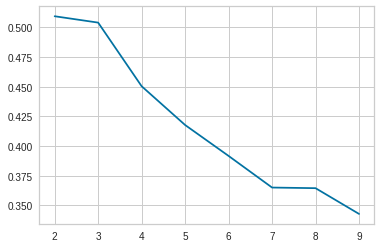

In [120]:
silhouette_avg = []
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(df)
    silhouette_avg.append(silhouette_score(df,kmeans_fit.labels_))
    #print(silhouette_score(df,y_pred))
plt.plot(range(2,10), silhouette_avg)

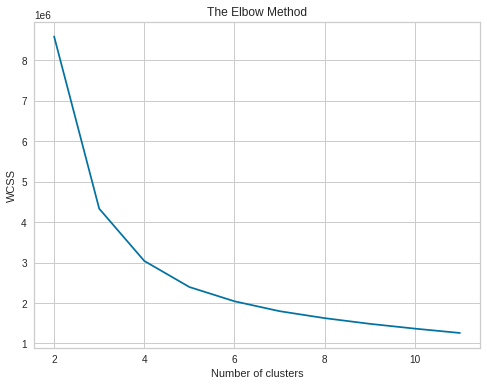

In [121]:
from yellowbrick.cluster import SilhouetteVisualizer
wcss = []
fig, ax = plt.subplots(5, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7,8,9,10,11]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)
    wcss.append(km.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
df['Clus_km'] = y_pred
# print(df_dropped.head())
# print(df_dropped)
print(df.groupby('Clus_km').mean())

         fixed acidity  volatile acidity  citric acid  residual sugar  \
Clus_km                                                                 
0             7.619073          0.408045     0.291178        3.082236   
1             6.904481          0.287027     0.339768        7.260774   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Clus_km                                                                   
0         0.065702            18.437898             63.565464  0.994569   
1         0.048591            39.830428            155.912966  0.994795   

               pH  sulphates    alcohol  
Clus_km                                  
0        3.255131   0.571914  10.794757  
1        3.190302   0.499978  10.258580  


In [123]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [124]:
df=df.values[:, 1:]
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
print(df[:,9])
plt.scatter(df[:, 9], df[:, 5], c=y_pred.astype(np.float), alpha=.5)

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

[ 9.4  9.8  9.8 ...  9.4 12.8 11.8]


Text(0, 0.5, 'total sulfur dioxide')

In [125]:
# create 3 dimensional graph
from mpl_toolkits.mplot3d import Axes3D
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(df[:, 9], df[:, 5], df[:, 7], c= y_pred.astype(np.float))

In [126]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
start = perf_counter() 
Aggmodel=ml=AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward').fit(df)
end=perf_counter() 
y_pred = Aggmodel.labels_
print(y_pred)
print('耗費時間：',end-start)
score = silhouette_score(df, y_pred, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
V_measure_score = metrics.v_measure_score(y_true, y_pred)
print("V-measure:",V_measure_score)

[2 6 2 ... 5 5 3]
耗費時間： 1.712200717000087
Silhouetter Score: 0.281
V-measure: 0.016937429153645427


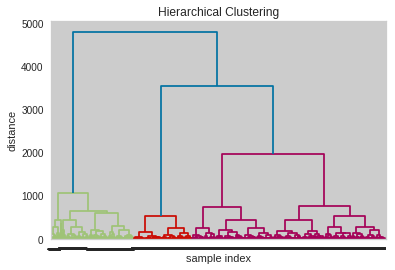

In [129]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(df,metric='euclidean',method='ward')
sch.dendrogram(dis,labels=y_pred)
plt.title('Hierarchical Clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [130]:
from sklearn.cluster import DBSCAN
import numpy as np
start = perf_counter() 
clustering = DBSCAN(eps=5, min_samples=2).fit(df)
end = perf_counter() 
clustering=clustering.labels_
clustering
print('耗費時間：',end-start)
score = silhouette_score(df, y_pred, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
V_measure_score = metrics.v_measure_score(y_true, y_pred)
print("V-measure:",V_measure_score)

耗費時間： 0.12148463499943318
Silhouetter Score: 0.281
V-measure: 0.016937429153645427
